In [3]:
from datasets import load_dataset

dataset = load_dataset('Kili/plastic_in_river', num_proc=6)

/Users/kevin/miniconda3/envs/cos429/lib/python3.8/site-packages/datasets/load.py:1486: FutureWarning: The repository for Kili/plastic_in_river contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Kili/plastic_in_river
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(



0: 1088x1920 2 PLASTIC_BOTTLEs, 32156.8ms
Speed: 40.4ms preprocess, 32156.8ms inference, 3.9ms postprocess per image at shape (1, 3, 1088, 1920)


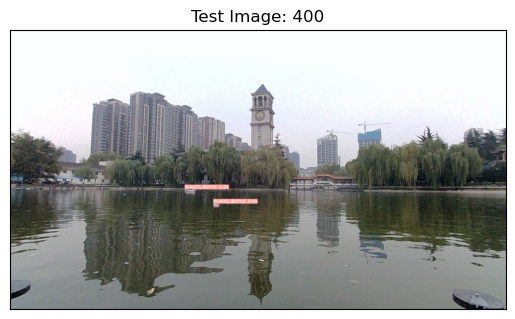


0: 1088x1920 2 PLASTIC_BOTTLEs, 32720.4ms
Speed: 23.2ms preprocess, 32720.4ms inference, 4.8ms postprocess per image at shape (1, 3, 1088, 1920)


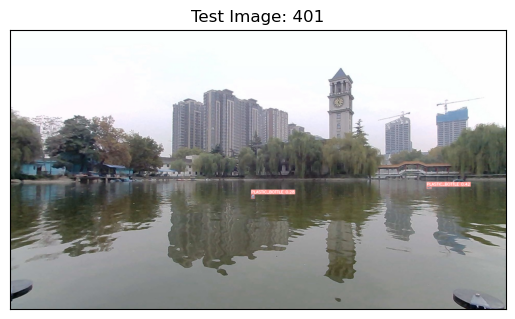


0: 1088x1920 1 PLASTIC_BOTTLE, 31767.0ms
Speed: 34.9ms preprocess, 31767.0ms inference, 3.7ms postprocess per image at shape (1, 3, 1088, 1920)


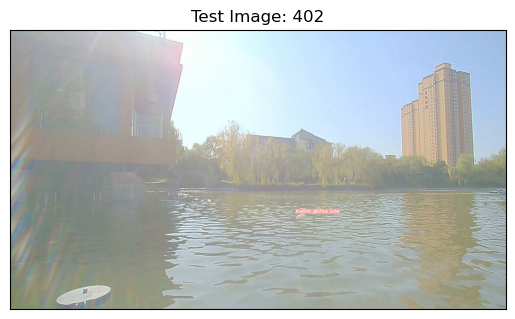


0: 1088x1920 7 PLASTIC_BOTTLEs, 1 NOT_PLASTIC_WASTE, 31627.9ms
Speed: 20.1ms preprocess, 31627.9ms inference, 5.6ms postprocess per image at shape (1, 3, 1088, 1920)


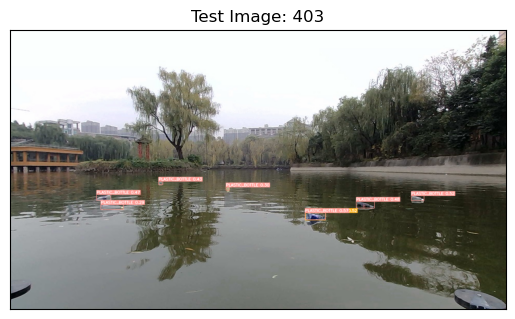


0: 1088x1920 2 PLASTIC_BOTTLEs, 29099.6ms
Speed: 20.2ms preprocess, 29099.6ms inference, 3.1ms postprocess per image at shape (1, 3, 1088, 1920)


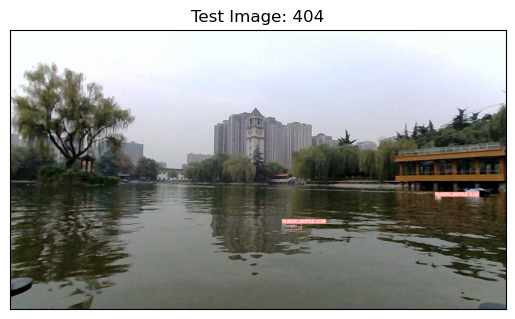

In [5]:
from PIL import Image
from matplotlib import pyplot as plt
from ultralytics import YOLO
import torch

# define the YOLO Model Architecture
model = YOLO('/Users/kevin/Desktop/cv/final_project/obj_det_gpu/results3/train/weights/best.pt')  # Initialize your YOLO model

# layers of model
# print(model)


def plot_img(val):
    img = dataset['test'][val]['image']

    pred = model.predict(img)[0]
    # plotting the image with bounding boxes
    
    pred = pred.plot(line_width=1)
    
    # convert from BGR to RGB
    pred_rgb = pred[..., ::-1]
    pred_img = Image.fromarray(pred_rgb)

    plt.imshow(pred_img)
    plt.title(f'Test Image: {val}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

# prediction of 5 images
for i in range(400,405):
    plot_img(i)
